Notebook for manually playing with model hyperparameters

In [41]:
from alfalfa import AlfalfaTree, AlfalfaForest
from alfalfa.tree_models.tree_kernels import AlfalfaGP
from alfalfa.tree_models.forest import DecisionNode
from alfalfa.fitting.bart.bart import BART
from alfalfa.fitting.bart.data import Data
from alfalfa.leaf_gp.space import Space, Dimension
from alfalfa.fitting.bart.params import BARTTrainParams
from alfalfa.utils.plots import plot_gp_1d, plot_covar_matrix

import math
import torch
import numpy as np
import gpytorch
from matplotlib import pyplot as plt
from pathlib import Path
import scipy.stats as stats

# model.eval()

# fig, axs = plt.subplots(ncols=3)
# axs[0].plot(logger["noise"])
# axs[1].plot(logger["scale"])
# with torch.no_grad():
#     cov = model.covar_module(test_x).evaluate().numpy()
# axs[2].imshow(cov, interpolation="nearest")

# plt.show()

In [2]:
# data
train_x = torch.linspace(0, 1, 10).reshape(-1, 1)
space = Space([[0.0, 1.0]])

# True function is sin(2*pi*x) with Gaussian noise
torch.manual_seed(42)
np.random.seed(42)
f = lambda x: torch.sin(x * (2 * math.pi))
train_y = (f(train_x) + torch.randn(train_x.size()) * 0.2).flatten()

In [30]:
# load model
likelihood = gpytorch.likelihoods.GaussianLikelihood(noise_constraint=gpytorch.constraints.Positive())
model = AlfalfaGP(train_x, train_y, likelihood, None)
model_path = Path("../../models/1d_bart.pt")
model.load_state_dict(torch.load(model_path))
model.tree_model.initialise(space)

tensor(0.1132)


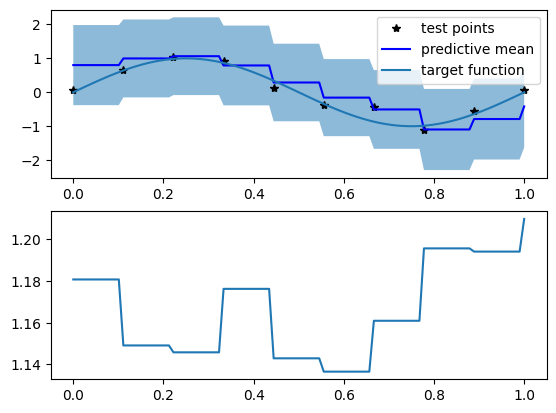

In [40]:
# plot
model.eval()
model.likelihood.noise = 0.2
model.covar_module.outputscale = 2.0
print(train_x.var())
test_x = torch.linspace(0, 1, 100).reshape(-1, 1)
fig, ax = plot_gp_1d(model, test_x, f)


In [36]:
model.covar_module.outputscale
model.train_targets

tensor([ 0.0673,  0.6685,  1.0317,  0.9121,  0.1174, -0.3793, -0.4244, -1.1124,
        -0.5505,  0.0535])

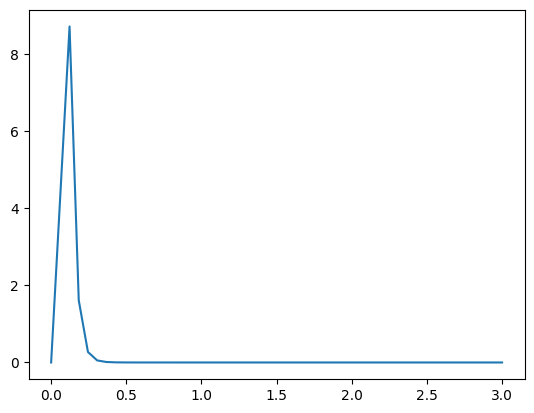

In [48]:
# alpha = 10
# beta = (alpha - 1) * train_x.var().item()
# dist = stats.invgamma(a=alpha, scale=beta)
# t = np.linspace(0, 3)
# plt.plot(t, dist.pdf(t))